# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [3]:
df_rv_tmp = pd.read_csv('../datasets/bgg-19m-reviews.csv')
df_bg = pd.read_csv('../datasets/games-cleaned.csv')

# Data Cleaning & EDA (Reviews)

In [4]:
df_rv = df_rv_tmp.copy()
df_rv.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


In [5]:
df_rv.shape

(18964807, 6)

ตัดรีวิวที่ `name` ไม่ได้อยู่ใน `df_bg` 

In [6]:
df_rv = df_rv[df_rv['name'].isin(df_bg['name'])]
df_rv = df_rv[['user', 'name', 'rating', 'comment']]
df_rv.shape

(15281411, 4)

In [7]:
df_rv['rating'].describe()

count    1.528141e+07
mean     7.282578e+00
std      1.471673e+00
min      1.401300e-45
25%      6.500000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

ตัดข้อมูลที่ `rating` น้อยกว่า 1

In [8]:
df_rv = df_rv[df_rv['rating']>=1]
df_rv['rating'].describe()

count    1.528141e+07
mean     7.282580e+00
std      1.471670e+00
min      1.000000e+00
25%      6.500000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

ตัดข้อมูลที่ไม่มี `user`

In [9]:
df_rv = df_rv[df_rv['user'] == df_rv['user']]

ตัด `user` ที่มีการให้คะแนนน้อยกว่า 100 เกม

In [10]:
cv = df_rv['user'].value_counts()
df_rv = df_rv[df_rv['user'].isin(cv[cv >= 450].index)]
df_rv.shape

(2041970, 4)

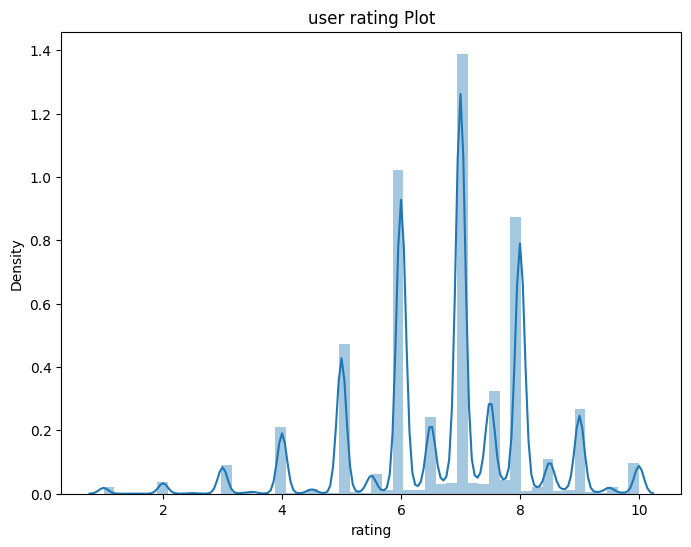

In [11]:
plt.figure(figsize=(8,6))
plt.title('user rating Plot')
sns.distplot(df_rv['rating'])
plt.show()

ผู้ใช้ส่วนใหญ่ให้ `rating` ที่ 6-8

In [12]:
not_comment = df_rv.isna().sum().sort_values(ascending=False)[0]

d = {"doesn't comment": not_comment, 'comment': df_rv.shape[0]-not_comment}    
ser_comment = pd.Series(data=d, index=["doesn't comment", 'comment'])
ser_comment

doesn't comment    1509499
comment             532471
dtype: int64

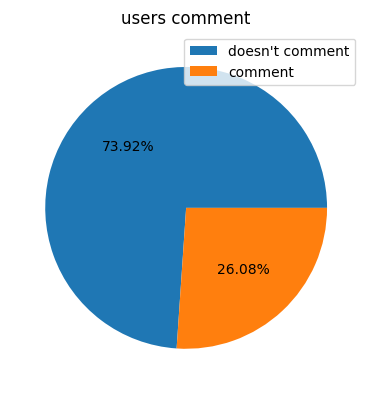

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('users comment')
plt.pie(ser_comment, autopct='%.2f%%')
plt.legend(ser_comment.index)
plt.show()

มีผู้ใช้ที่ `comment` เพียง 26% จากรีวิวทั้งหมด (5 แสนคนจาก 2 ล้านคน)

# Save clean data to CSV

In [14]:
# df_rv.to_csv('reviews-cleaned.csv', index=False)